In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import const as CONST
from utils import read_csv_ts, robust_pct

['AEM', 'AUY', 'HMY', 'KGC', 'NEM']


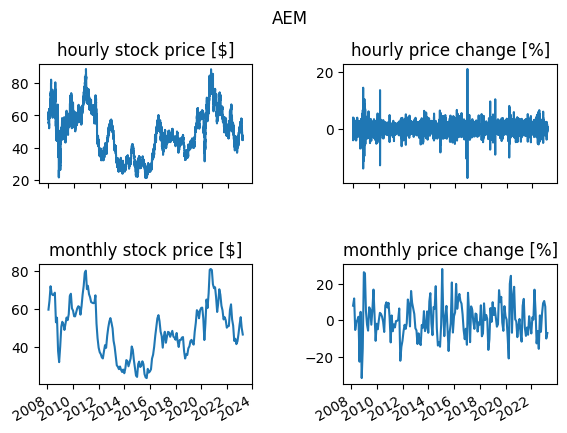

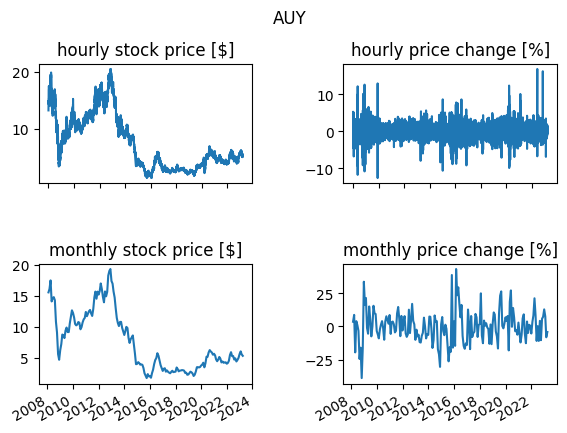

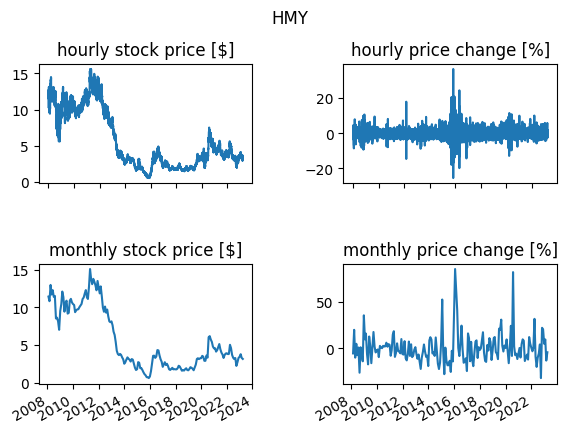

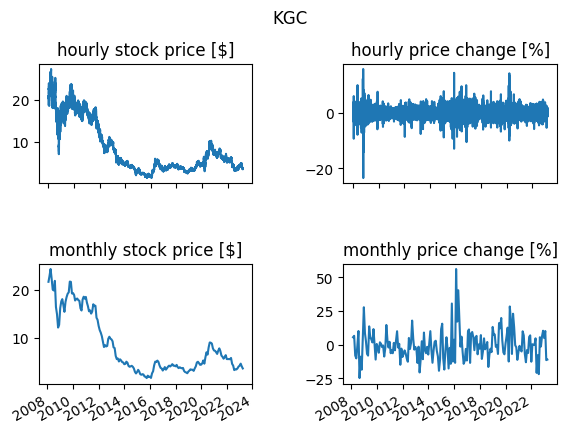

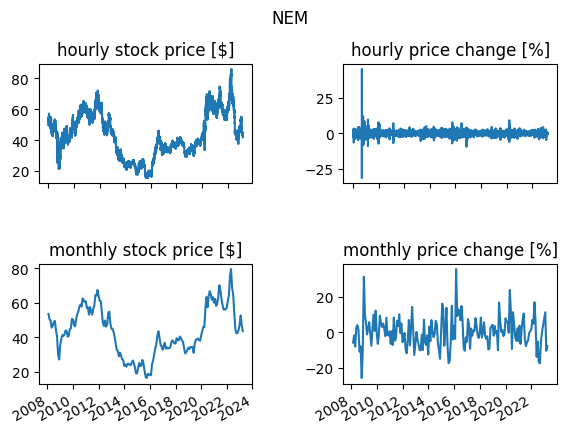

In [2]:

print(CONST.TICKERS)
def present_stock(ticker, feature_name):
    csv = f"{CONST.PATHS.MERGED}/{ticker}.csv"
    df = read_csv_ts(csv)
    df = df[feature_name]
    figure, axis = plt.subplots(2, 2)
    figure.tight_layout(pad=3)

    axis[0][0].plot(df)
    axis[0][0].set_title(f"hourly stock price [$]")

    monthly_df = df.resample("M").mean()
    axis[1][0].plot(monthly_df)
    axis[1][0].set_title(f"monthly stock price [$]")


    figure.tight_layout(pad=3)
    axis[0][1].plot(robust_pct(df) * 100)
    axis[0][1].set_title(f"hourly price change [%]")
    axis[1][1].plot(robust_pct(monthly_df) * 100)
    axis[1][1].set_title(f"monthly price change [%]")
    figure.suptitle(f"{ticker}", fontsize=12)
    figure.autofmt_xdate()


for ticker in CONST.TICKERS:
    present_stock(ticker,CONST.FEATURES.PRICE)
plt.show()

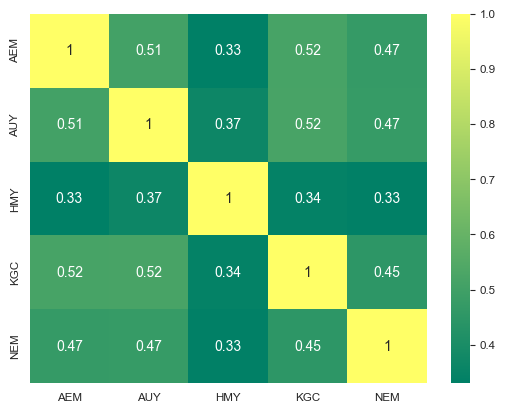

In [3]:
from darts import TimeSeries
import numpy as np

sns.set_style("whitegrid")
stocks_dict = {}
for ticker in CONST.TICKERS:
    csv_path = f"{CONST.PATHS.MERGED}/{ticker}.csv"
    pd_series = read_csv_ts(csv_path)[CONST.FEATURES.PRICE]
    series = TimeSeries.from_series(pd_series)
    series = series.astype(np.float32)
    train, _ = series.split_before(CONST.TRAIN_DATE_SPLIT)
    stocks_dict[ticker] = train.pd_series()

stocks_df = pd.DataFrame(stocks_dict)
stocks_df = robust_pct(stocks_df)
plt.figure("Stocks corr")
sns.heatmap(stocks_df.corr(), annot=True, cmap="summer")
plt.show()